In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

是什麼? 貓


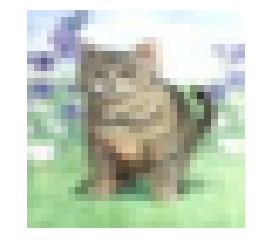

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("是什麼?", trans[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
# Flatten: 把輸入拉成一維
from keras.layers import Dense, Flatten
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D)
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
